<a href="https://colab.research.google.com/github/David-Jones0208/David-Jones-1912462-HONS-PROJECT/blob/main/Hons_Project_David_Jones_1912462.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construction of Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf


## Dataset

In [ ]:
# Create a DF
data = {
    'First_Name': ['Gareth', 'David', 'Kenny', 'Didier', 'Zlatan', 'Kylian',
                   'Lionel', 'Willie', 'Bojan', 'Cristiano'],

    'Sur_Name': ['Bale', 'Beckham', 'Dalglish', 'Drogba', 'Ibrahimovic', 'Mbappe',
                  'Messi', 'Miller', 'Miovski', 'Ronaldo'],

    'Age': [34, 48, 72, 45, 42, 25, 36, 68, 24, 39],

    'Nation': ['Wales', 'England', 'Scotland', 'Ivory Coast', 'Sweden', 'France',
                'Argentina', 'Scotland', 'North Macedonia', 'Portugal'],

    'Current_club': ['N/a', 'N/a', 'N/a', 'N/a', 'N/a', 'PSG',
                     'Inter Miami', 'N/a', 'Aberdeen', 'Al Nassr'],

    'Position': ['Winger', 'Midfielder', 'Striker', 'Striker', 'Striker', 'Striker',
                  'Winger', 'Winger', 'Defender,', 'Striker'],

    'Goals': [185, 127, 229, 302, 496, 273, 821, 22, 64, 745],

    'Former_clubs': ['LAFC, Real Madrid, Tottenham, Southampton',
                     'PSG, LA Galaxy, AC Milan, Real Madrid, Man Utd',
                     'Liverpool, Celtic',
                     'Phoneix, Montreal, Chelsea, Galatasaray, Shaghai, Marseille, Guingamp, Le Mans',
                     'AC Milan, LA Galaxy, Man Utd, PSG, Barcelona, Inter Milan, Juventus, Ajax, Malmo',
                     'Monaco',
                     'PSG, Barcelona',
                     'Aberdeen, Peterhead',
                     'MTK, Renova, Makedonija, Rabotnichki, Bregalnica',
                     'Man Utd, Juventus, Real Madrid, Sporting Lisbon'],


}
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('data.csv', index=False)

In [ ]:
df

,First_Name,Sur_Name,Age,Nation,Current_club,Position,Goals,Former_clubs
0,Gareth,Bale,34,Wales,N/a,Winger,185,"LAFC, Real Madrid, Tottenham, Southampton"
1,David,Beckham,48,England,N/a,Midfielder,127,"PSG, LA Galaxy, AC Milan, Real Madrid, Man Utd"
2,Kenny,Dalglish,72,Scotland,N/a,Striker,229,"Liverpool, Celtic"
3,Didier,Drogba,45,Ivory Coast,N/a,Striker,302,"Phoneix, Montreal, Chelsea, Galatasaray, Shagh..."
4,Zlatan,Ibrahimovic,42,Sweden,N/a,Striker,496,"AC Milan, LA Galaxy, Man Utd, PSG, Barcelona, ..."
5,Kylian,Mbappe,25,France,PSG,Striker,273,Monaco
6,Lionel,Messi,36,Argentina,Inter Miami,Winger,821,"PSG, Barcelona"
7,Willie,Miller,68,Scotland,N/a,Winger,22,"Aberdeen, Peterhead"
8,Bojan,Miovski,24,North Macedonia,Aberdeen,"Defender,",64,"MTK, Renova, Makedonija, Rabotnichki, Bregalnica"
9,Cristiano,Ronaldo,39,Portugal,Al Nassr,Striker,745,"Man Utd, Juventus, Real Madrid, Sporting Lisbon"


In [ ]:
# The path to image directory
base_dir = '/content/drive/MyDrive/Hons_Images'  # adjust this to your actual path

# the list of subdirectories in the base directory
folders = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Load existing Df
df = pd.read_csv('data.csv')  # replace with the path to your CSV file

# Add a new column for the image paths
df['Image_Paths'] = pd.Series(dtype=object)

for folder in folders:
    # Get the list of image files in the folder
    image_files = [os.path.join(base_dir, folder, f) for f in os.listdir(os.path.join(base_dir, folder)) if f.endswith('.jpg')]  # adjust this if your images are not in .jpg format

    # Find the rows in the DataFrame where 'Sur_Name' matches the folder name
    matches = df['Sur_Name'] == folder

    # If matches are found, add the image paths to the 'Image_Paths' column for each matching row
    for idx in df.index[matches]:
        df.at[idx, 'Image_Paths'] = [image_files]

# Save DataFrame to CSV
df.to_csv('existing_dataframe.csv', index=False)

In [ ]:
print(df)

  First_Name     Sur_Name  Age           Nation Current_club    Position  \
0     Gareth         Bale   34            Wales          N/a      Winger   
1      David      Beckham   48          England          N/a  Midfielder   
2      Kenny     Dalglish   72         Scotland          N/a     Striker   
3     Didier       Drogba   45      Ivory Coast          N/a     Striker   
4     Zlatan  Ibrahimovic   42           Sweden          N/a     Striker   
5     Kylian       Mbappe   25           France          PSG     Striker   
6     Lionel        Messi   36        Argentina  Inter Miami      Winger   
7     Willie       Miller   68         Scotland          N/a      Winger   
8      Bojan      Miovski   24  North Macedonia     Aberdeen   Defender,   
9  Cristiano      Ronaldo   39         Portugal     Al Nassr     Striker   

   Goals                                       Former_clubs  \
0    185          LAFC, Real Madrid, Tottenham, Southampton   
1    127     PSG, LA Galaxy, AC Milan

In [ ]:
# # Load DataFrame from CSV
# df = pd.read_csv('existing_dataframe.csv')  # replace with the path to your CSV file


# # Choose a surname
# surname = 'Miller'

# # Select the row from the DataFrame
# row = df[df['Sur_Name'] == surname].iloc[0]

# # Get the list of image paths from the 'Image_Paths' column
# image_paths = eval(row['Image_Paths'])  # use eval to convert the string back into a list

# # Flatten the list of image paths
# image_paths = [item for sublist in image_paths for item in sublist]

# # Loop over each image path
# for image_path in image_paths:
#     # Open the image file
#     img = Image.open(image_path)

#     # Display the image
#     #plt.imshow(img)
    #plt.show()

In [ ]:
# # Load DataFrame from CSV
# df = pd.read_csv('existing_dataframe.csv')  # replace with the path to your CSV file

# # Define the new size
# new_size = (224, 224)

# # Loop over each row in the DataFrame
# for i, row in df.iterrows():
#     # Get the list of image paths from the 'Image_Paths' column
#     image_paths = eval(row['Image_Paths'])  # use eval to convert the string back into a list

#     # Flatten the list of image paths
#     image_paths = [item for sublist in image_paths for item in sublist]

#     # Loop over each image path
#     for image_path in image_paths:
#         # Open the image file
#         img = Image.open(image_path)

#         # Resize the image
#         img = img.resize(new_size)

#         # Display the image
#         #plt.imshow(img)
#         #plt.show()

## Train/Test Creation

In [ ]:
# Load DataFrame from CSV
df = pd.read_csv('existing_dataframe.csv')  # replace with the path to your CSV file

# Get the list of all image paths and labels
image_paths = []
labels = []


for i, row in df.iterrows():
    paths = eval(row['Image_Paths'])  # use eval to convert the string back into a list
    image_paths.extend([item for sublist in paths for item in sublist])
    print(image_paths)
    labels.extend([row['Sur_Name']] * len([item for sublist in paths for item in sublist]))

    # image_paths.append(paths)


# Split the data into a training set and a test set
print(image_paths, len(labels))

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

print(test_labels)

['/content/drive/MyDrive/Hons_Images/Bale/1.jpg', '/content/drive/MyDrive/Hons_Images/Bale/2.jpg', '/content/drive/MyDrive/Hons_Images/Bale/3.jpg', '/content/drive/MyDrive/Hons_Images/Bale/4.jpg', '/content/drive/MyDrive/Hons_Images/Bale/5.jpg', '/content/drive/MyDrive/Hons_Images/Bale/6.jpg', '/content/drive/MyDrive/Hons_Images/Bale/7.jpg', '/content/drive/MyDrive/Hons_Images/Bale/8.jpg', '/content/drive/MyDrive/Hons_Images/Bale/9.jpg', '/content/drive/MyDrive/Hons_Images/Bale/10.jpg', '/content/drive/MyDrive/Hons_Images/Bale/11.jpg', '/content/drive/MyDrive/Hons_Images/Bale/12.jpg', '/content/drive/MyDrive/Hons_Images/Bale/13.jpg', '/content/drive/MyDrive/Hons_Images/Bale/14.jpg', '/content/drive/MyDrive/Hons_Images/Bale/15.jpg', '/content/drive/MyDrive/Hons_Images/Bale/16.jpg', '/content/drive/MyDrive/Hons_Images/Bale/17.jpg', '/content/drive/MyDrive/Hons_Images/Bale/18.jpg', '/content/drive/MyDrive/Hons_Images/Bale/19.jpg', '/content/drive/MyDrive/Hons_Images/Bale/20.jpg']
['/conte

In [ ]:
print(f"Number of training images: {len(train_image_paths)}") #Training images
print(f"Number of test images: {len(test_image_paths)}") #Test images

Number of training images: 158
Number of test images: 40


# **Architectures**

## KNN Architecture

### knn attempt 1

In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load images and extract features (e.g., pixel intensities)
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (64, 64))
        images.append(img.flatten())  # Flatten image to a 1D array
    return np.array(images)

# Load train and test images
X_train = load_images(train_image_paths)
X_test = load_images(test_image_paths)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn.fit(X_train, train_labels)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Accuracy: 0.07


### knn attempt 2

In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load images and extract features (e.g., pixel intensities)
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (64, 64))
        images.append(img.flatten())  # Flatten image to a 1D array
    return np.array(images)

# Load train and test images
X_train = load_images(train_image_paths)
X_test = load_images(test_image_paths)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, train_labels)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.03


### knn attempt 3

In [ ]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load images and extract features (e.g., pixel intensities)
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (64, 64))
        images.append(img.flatten())  # Flatten image to a 1D array
    return np.array(images)

# Load train and test images
X_train = load_images(train_image_paths)
X_test = load_images(test_image_paths)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=99)

# Train the model
knn.fit(X_train, train_labels)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.12




## ResNet-50 Architecture

### First Attempt

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to load and preprocess each image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # load and resize the image
    img = img_to_array(img)  # convert the image to an array
    img = np.expand_dims(img, axis=0)  # add an extra dimension
    img = preprocess_input(img)  # preprocess the image
    return img[0]

# Load and preprocess each image in the training set and the test set
train_images = np.array([preprocess_image(img_path) for img_path in train_image_paths])
test_images = np.array([preprocess_image(img_path) for img_path in test_image_paths])

# Convert the labels to one-hot encoding
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)

# Convert the test labels to one-hot encoding
test_labels_encoded = le.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_images, train_labels):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_images[train], train_labels[train],
              batch_size=32,
              epochs=50,  # Change the number of epochs to 20
              verbose=1,
              validation_data=(test_images, test_labels))  # Add validation_data parameter

  # Increase fold number
  fold_no = fold_no + 1

# After training the model with k-fold cross-validation, evaluate it on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print("Final test accuracy: ", test_accuracy)


### Second Attempt Overfitting Mended

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)  # Add dropout layer
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to load and preprocess each image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # load and resize the image
    img = img_to_array(img)  # convert the image to an array
    img = np.expand_dims(img, axis=0)  # add an extra dimension
    img = preprocess_input(img)  # preprocess the image
    return img[0]

# Load and preprocess each image in the training set and the test set
train_images = np.array([preprocess_image(img_path) for img_path in train_image_paths])
test_images = np.array([preprocess_image(img_path) for img_path in test_image_paths])

# Convert the labels to one-hot encoding
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)

# Convert the test labels to one-hot encoding
test_labels_encoded = le.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_images, train_labels):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_images[train], train_labels[train],
              batch_size=5,
              epochs=10,
              verbose=1,
              validation_data=(test_images, test_labels),
              callbacks=[early_stopping])  # Add early stopping

  # Increase fold number
  fold_no = fold_no + 1

# After training the model with k-fold cross-validation, evaluate it on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print("Final test accuracy: ", test_accuracy)


ValueError: y should be a 1d array, got an array of shape (158, 10) instead.

### Third Attempt more epochs and folds added

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)  # Add dropout layer
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False



# Function to load and preprocess each image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # load and resize the image
    img = img_to_array(img)  # convert the image to an array
    img = np.expand_dims(img, axis=0)  # add an extra dimension
    img = preprocess_input(img)  # preprocess the image
    return img[0]

# Load and preprocess each image in the training set and the test set
train_images = np.array([preprocess_image(img_path) for img_path in train_image_paths])
test_images = np.array([preprocess_image(img_path) for img_path in test_image_paths])

# Convert the labels to one-hot encoding
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)

# Convert the test labels to one-hot encoding
test_labels_encoded = le.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_images, train_labels):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  model = Model(inputs=base_model.input, outputs=predictions)
  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Fit data to model
  history = model.fit(train_images[train], train_labels[train],
              batch_size=5,
              epochs=20,
              verbose=1,
              validation_data=(test_images, test_labels),
              callbacks=[early_stopping])  # Add early stopping

  # Increase fold number
  fold_no = fold_no + 1

# After training the model with k-fold cross-validation, evaluate it on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print("Final test accuracy: ", test_accuracy)


ValueError: y should be a 1d array, got an array of shape (158, 10) instead.

## ResNet-18 Architecture

### Attempt 1

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)  # Add dropout layer
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to load and preprocess each image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # load and resize the image
    img = img_to_array(img)  # convert the image to an array
    img = np.expand_dims(img, axis=0)  # add an extra dimension
    img = preprocess_input(img)  # preprocess the image
    return img[0]

# Load and preprocess each image in the training set and the test set
train_images = np.array([preprocess_image(img_path) for img_path in train_image_paths])
test_images = np.array([preprocess_image(img_path) for img_path in test_image_paths])

# Convert the labels to one-hot encoding
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)

# Convert the test labels to one-hot encoding
test_labels_encoded = le.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_images, train_labels):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(train_images[train], train_labels[train],
              batch_size=5,
              epochs=10,
              verbose=1,
              validation_data=(test_images, test_labels),
              callbacks=[early_stopping])  # Add early stopping

  # Increase fold number
  fold_no = fold_no + 1

# After training the model with k-fold cross-validation, evaluate it on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print("Final test accuracy: ", test_accuracy)


94765736/94765736 [==============================] - 0s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
26/26 [==============================] - 8s 103ms/step - loss: 22.6411 - accuracy: 0.1270 - val_loss: 20.0219 - val_accuracy: 0.3250
Epoch 2/10
26/26 [==============================] - 1s 36ms/step - loss: 1.3518 - accuracy: 0.9048 - val_loss: 17.9815 - val_accuracy: 0.3250
Epoch 3/10
26/26 [==============================] - 1s 35ms/step - loss: 0.2441 - accuracy: 0.9841 - val_loss: 16.9381 - val_accuracy: 0.3750
Epoch 4/10
26/26 [==============================] - 1s 28ms/step - loss: 9.3200e-05 - accuracy: 1.0000 - val_loss: 16.0498 - val_accuracy: 0.3500
Epoch 5/10
26/26 [==============================] - 1s 26ms/step - loss: 6.6285e-05 - accuracy: 1.0000 - val_loss: 15.7813 - val_accuracy: 0.3500
Epoch 6/10
26/26 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 15.

## My own CNN Architecture

### Attempt 1

Epoch 1/50
5/5 [==============================] - 5s 153ms/step - loss: -871.7429 - accuracy: 0.1076 - val_loss: -2040.7041 - val_accuracy: 0.0500
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: -2890.5071 - accuracy: 0.1139 - val_loss: -4583.7671 - val_accuracy: 0.0500
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: -5816.8364 - accuracy: 0.1139 - val_loss: -7986.5767 - val_accuracy: 0.0500
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: -9743.4092 - accuracy: 0.1139 - val_loss: -12454.1797 - val_accuracy: 0.0500
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: -14718.1768 - accuracy: 0.1139 - val_loss: -18388.4023 - val_accuracy: 0.0500
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: -21656.7383 - accuracy: 0.1139 - val_loss: -26071.6484 - val_accuracy: 0.0500
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: -30253.4238 - accuracy: 0.1139 - val_loss:

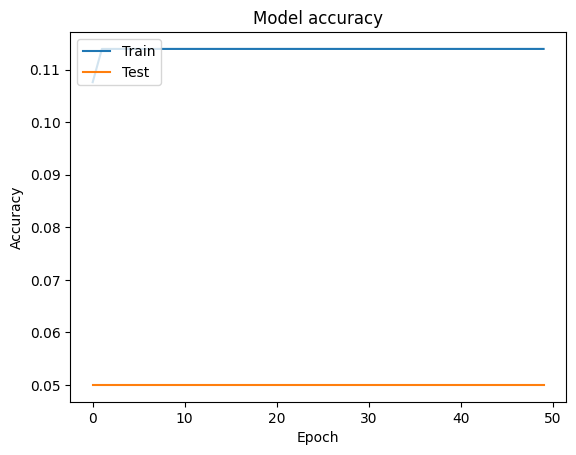

2/2 [==============================] - 0s 7ms/step - loss: -33476902.0000 - accuracy: 0.0500
Test accuracy: 0.05000000074505806


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize the CNN
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flattening layer
model.add(Flatten())

# Add the full connection layer
model.add(Dense(units=128, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess the images
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(64, 64))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return np.vstack(images)

train_images = load_images(train_image_paths)
test_images = load_images(test_image_paths)

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Convert labels to binary format
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)

# Fit the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

# Plot the accuracy for each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


### Attempt 2

Epoch 1/50
5/5 [==============================] - 2s 135ms/step - loss: -2927.1294 - accuracy: 0.1076 - val_loss: -7250.1748 - val_accuracy: 0.0500
Epoch 2/50
5/5 [==============================] - 1s 121ms/step - loss: -10133.0566 - accuracy: 0.1139 - val_loss: -15913.4863 - val_accuracy: 0.0500
Epoch 3/50
5/5 [==============================] - 1s 121ms/step - loss: -18643.6875 - accuracy: 0.1139 - val_loss: -25692.3340 - val_accuracy: 0.0500
Epoch 4/50
5/5 [==============================] - 1s 134ms/step - loss: -28003.3359 - accuracy: 0.1139 - val_loss: -36455.0547 - val_accuracy: 0.0500
Epoch 5/50
5/5 [==============================] - 1s 120ms/step - loss: -38946.7344 - accuracy: 0.1139 - val_loss: -48273.5625 - val_accuracy: 0.0500
Epoch 6/50
5/5 [==============================] - 1s 118ms/step - loss: -50192.3242 - accuracy: 0.1139 - val_loss: -61382.5508 - val_accuracy: 0.0500
Epoch 7/50
5/5 [==============================] - 1s 117ms/step - loss: -64413.0000 - accuracy: 0.1139

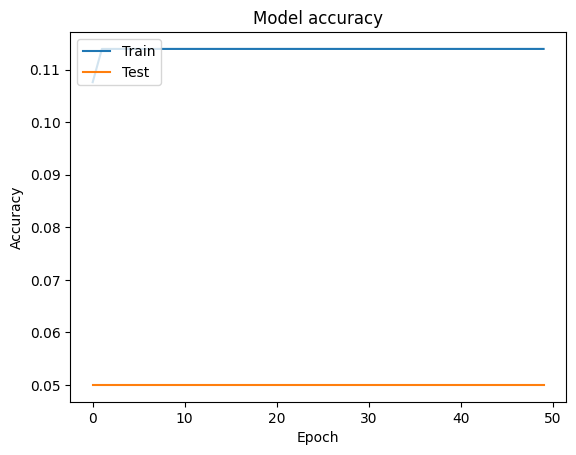

2/2 [==============================] - 0s 6ms/step - loss: -4299800.0000 - accuracy: 0.0500
Test accuracy: 0.05000000074505806


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize the CNN
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flattening layer
model.add(Flatten())

# Add the full connection layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Load and preprocess the images
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(128, 128))  # Updated target size
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return np.vstack(images)

train_images = load_images(train_image_paths)
test_images = load_images(test_image_paths)

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Convert labels to binary format
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)

# Fit the model
history = model.fit(datagen.flow(train_images, train_labels), epochs=50, validation_data=(test_images, test_labels))

# Plot the accuracy for each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


## Vison Transformer Architecture

In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import torch
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Subset
from PIL import Image
from timm.models import vision_transformer

# Load DataFrame from CSV
df = pd.read_csv('existing_dataframe.csv')

# Get the list of all image paths and labels
image_paths = []
labels = []

for i, row in df.iterrows():
    paths = eval(row['Image_Paths'])  # use eval to convert the string back into a list
    image_paths.extend([item for sublist in paths for item in sublist])
    labels.extend([row['Sur_Name']] * len([item for sublist in paths for item in sublist]))

# Create a mapping of labels to integers
label_to_int = {label: i for i, label in enumerate(set(labels))}

# Define your image transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add other transformations if needed
])

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")  # Load image and convert to RGB
        if self.transform:
            img = self.transform(img)
        label = label_to_int[self.labels[idx]]  # Convert label to integer using the mapping
        label = torch.tensor(label, dtype=torch.long)
        return img, label

# Create the full dataset
full_dataset = CustomDataset(image_paths, labels, transform=transform)

# Initialize ViT model
model = vision_transformer.vit_base_patch16_224(pretrained=True, num_classes=len(set(labels)))

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
batch_size = 32
num_epochs = 5
n_splits = 3 # Number of folds for k-fold cross-validation
early_stop_patience = 3  # Number of epochs with no improvement after which training will be stopped

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(full_dataset)):
    train_dataset = Subset(full_dataset, train_index)
    test_dataset = Subset(full_dataset, test_index)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for images, labels in train_loader:
            optimizer.zero_grad()  # Clear gradients
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate training accuracy for this epoch
        train_accuracy = correct_predictions / total_samples
        print(f"Fold [{fold + 1}/{n_splits}], Epoch [{epoch + 1}/{num_epochs}]: Loss = {total_loss:.4f}, Train Accuracy = {train_accuracy:.4f}")

        # Evaluate on test data
        model.eval()  # Set the model to evaluation mode
        correct_predictions_test = 0
        total_samples_test = 0
        total_loss_test = 0.0

        with torch.no_grad():  # No need to calculate gradients
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss_test += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_predictions_test += (predicted == labels).sum().item()
                total_samples_test += labels.size(0)

        # Calculate test accuracy for this epoch
        test_accuracy = correct_predictions_test / total_samples_test
        print(f"Test Accuracy = {test_accuracy:.4f}")

        # Check for early stopping
        if total_loss_test < best_loss:
            best_loss = total_loss_test
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stop_patience:
            print("Early stopping triggered.")
          # break

print("Training completed!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Fold [1/3], Epoch [1/5]: Loss = 13.4075, Train Accuracy = 0.0833
Test Accuracy = 0.1212
Fold [1/3], Epoch [2/5]: Loss = 10.4518, Train Accuracy = 0.2121
Test Accuracy = 0.1667
Fold [1/3], Epoch [3/5]: Loss = 6.4632, Train Accuracy = 0.5758
Test Accuracy = 0.2424
Fold [1/3], Epoch [4/5]: Loss = 2.2777, Train Accuracy = 0.8409
Test Accuracy = 0.3939
Fold [1/3], Epoch [5/5]: Loss = 0.8211, Train Accuracy = 0.9318
Test Accuracy = 0.3485
Early stopping triggered.
Fold [2/3], Epoch [1/5]: Loss = 5.4136, Train Accuracy = 0.7273
Test Accuracy = 0.8030
Fold [2/3], Epoch [2/5]: Loss = 2.4688, Train Accuracy = 0.8106
Test Accuracy = 0.9394
Fold [2/3], Epoch [3/5]: Loss = 0.9259, Train Accuracy = 0.9470
Test Accuracy = 0.9545
Fold [2/3], Epoch [4/5]: Loss = 0.1481, Train Accuracy = 1.0000
Test Accuracy = 0.9242
Fold [2/3], Epoch [5/5]: Loss = 0.0470, Train Accuracy = 1.0000
Test Accuracy = 0.9394
Early stopping triggered.
Fold [3/3], Epoch [1/5]: Loss = 0.3843, Train Accuracy = 0.9621
Test Accurac

# **Testing on images**

  First_Name Sur_Name  Age       Nation Current_club Position  Goals  \
3     Didier   Drogba   45  Ivory Coast          N/a  Striker    302   

                                        Former_clubs  \
3  Phoneix, Montreal, Chelsea, Galatasaray, Shagh...   

                                         Image_Paths  
3  [['/content/drive/MyDrive/Hons_Images/Drogba/1...  

 

<PIL.Image.Image image mode=RGB size=416x320 at 0x7E4BFCDB4F40>


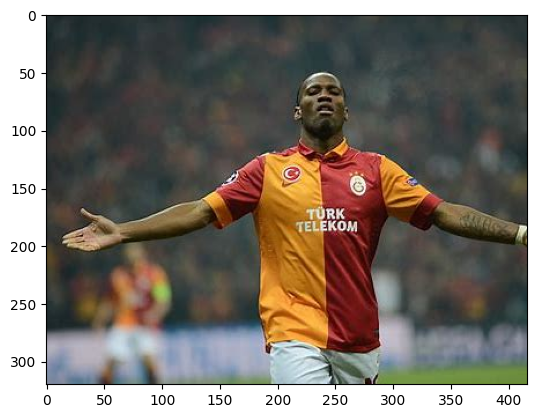

In [ ]:
img1 = Image.open("/content/drive/MyDrive/Hons_Images/Drogba/12.jpg").convert("RGB")

img1New = transform(img1)
outputs = model(img1New.unsqueeze(0))

_, predicted = torch.max(outputs, 1)

#print(predicted)
#print(label_to_int)

#name = label_to_int[predicted]

label_to_name = {value: key for key, value in label_to_int.items()}

#print(label_to_name)

name = label_to_name[predicted.item()]

info = df[df['Sur_Name'] == name]
print(info)


print("\n \n")

print(img1)

plt.imshow(img1)
plt.show()

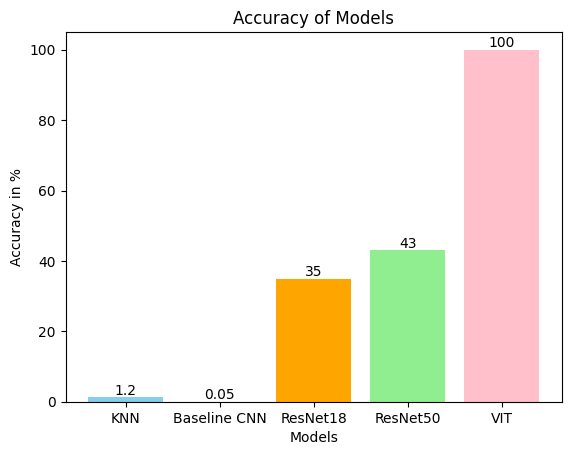

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

captions = ['KNN', 'Baseline CNN', 'ResNet18', 'ResNet50', 'VIT']
values = [1.2, 0.05, 35, 43, 100]  # Replace with your actual data

# Define custom colors for each bar
custom_colors = ['skyblue', 'lightgreen', 'orange', 'lightgreen', 'pink']

plt.bar(captions, values, color=custom_colors)
plt.xlabel('Models')
plt.ylabel('Accuracy in %')
plt.title('Accuracy of Models')

# Annotate each bar with its value
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()
